In [165]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib
import seaborn as sns
%matplotlib inline

## Loading and Preprocessing Stroke Data

In [166]:
# Loading data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [167]:
df.shape

(5110, 12)

In [168]:
df_cleaned = df.dropna(subset=['bmi', 'smoking_status'])

In [169]:
df_cleaned.shape

(4909, 12)

In [170]:
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [171]:
df_cleaned['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [172]:
df_cleaned = pd.get_dummies(df_cleaned)

In [173]:
df_cleaned.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,1,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,1,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False


In [174]:
df_cleaned.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [175]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   avg_glucose_level               4909 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          4909 non-null   int64  
 7   gender_Female                   4909 non-null   bool   
 8   gender_Male                     4909 non-null   bool   
 9   gender_Other                    4909 non-null   bool   
 10  ever_married_No                 4909 non-null   bool   
 11  ever_married_Yes                4909 non-null   bool   
 12  work_type_Govt_job              4909 no

In [176]:
# Define features set
X = df_cleaned.copy()
X.drop(columns=["stroke","id"], axis=1, inplace=True)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False


In [177]:
# Define target vector
y = df_cleaned["stroke"]
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [178]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [179]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [180]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [181]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [182]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Data Analysis
### Comparison of Stroke vs No Stroke Across Different Factors (Bar Chart)

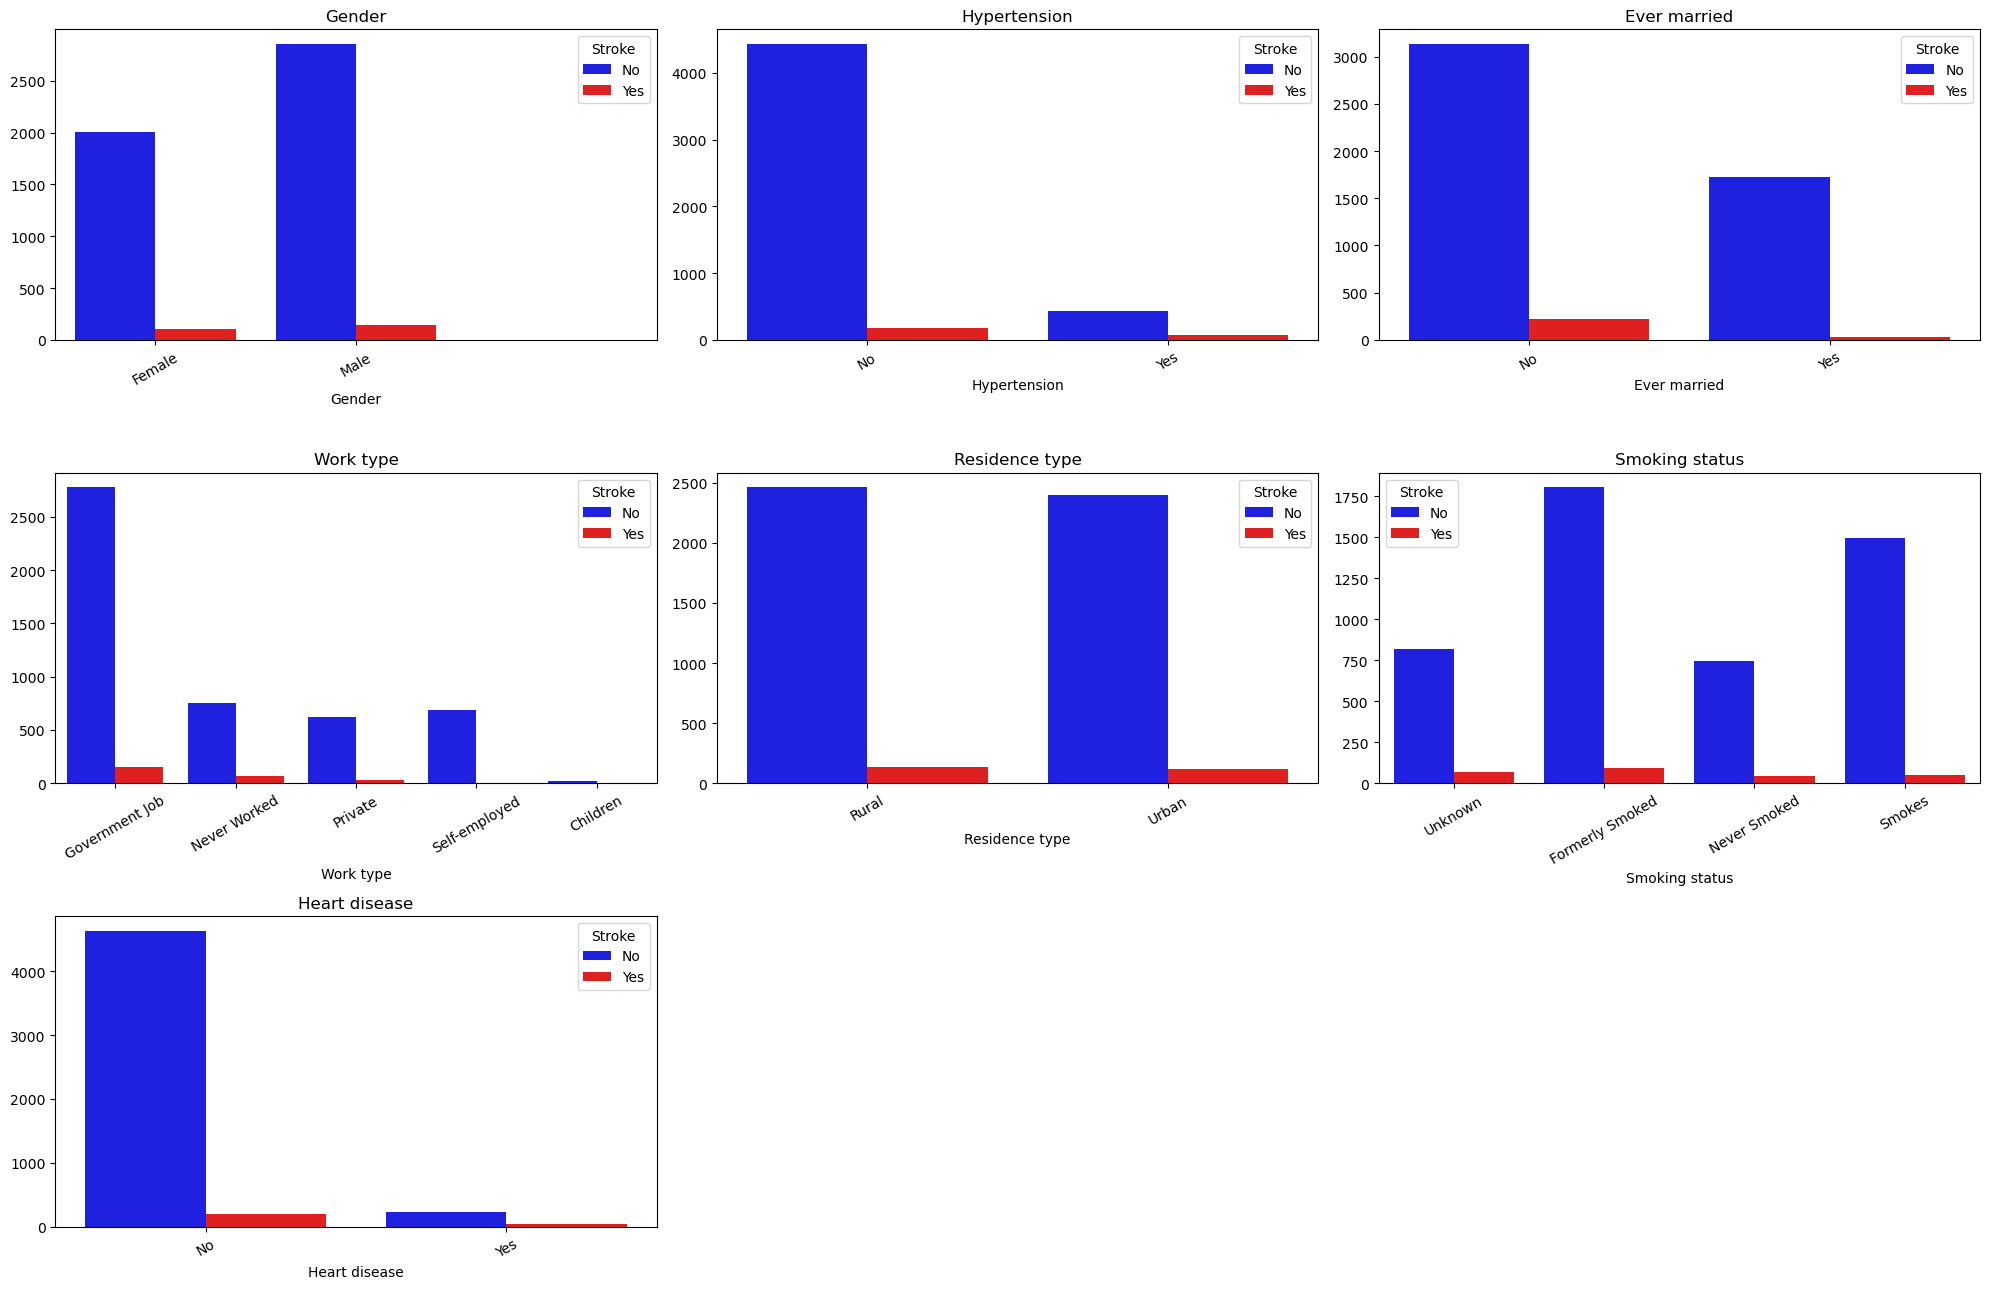

In [184]:

# Define categorical columns to visualize
columns = ['gender', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'heart_disease']

# Define label mappings for better readability
label_mappings = {
    'gender': ['Female', 'Male'],
    'hypertension': ['No', 'Yes'],
    'ever_married': ['No', 'Yes'],
    'work_type': ['Government Job', 'Never Worked', 'Private', 'Self-employed', 'Children'],
    'Residence_type': ['Rural', 'Urban'],
    'smoking_status': ['Unknown', 'Formerly Smoked', 'Never Smoked', 'Smokes'],
    'heart_disease': ['No', 'Yes']
}

# Set figure size
plt.figure(figsize=(20, 13))

# Loop through the categorical columns and create count plots
for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[col], hue=df['stroke'], palette=['blue', 'red'])
    plt.title(col.replace('_', ' ').capitalize())
    
    # Adjust x-ticks for better readability
    if col in label_mappings:
        plt.xticks(
            ticks=range(len(label_mappings[col])),
            labels=label_mappings[col],
            rotation=30
        )
    
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.ylabel("")
    plt.legend(title="Stroke", labels=['No', 'Yes'])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Stroke Distribution by Different Factors (Pie Chart)

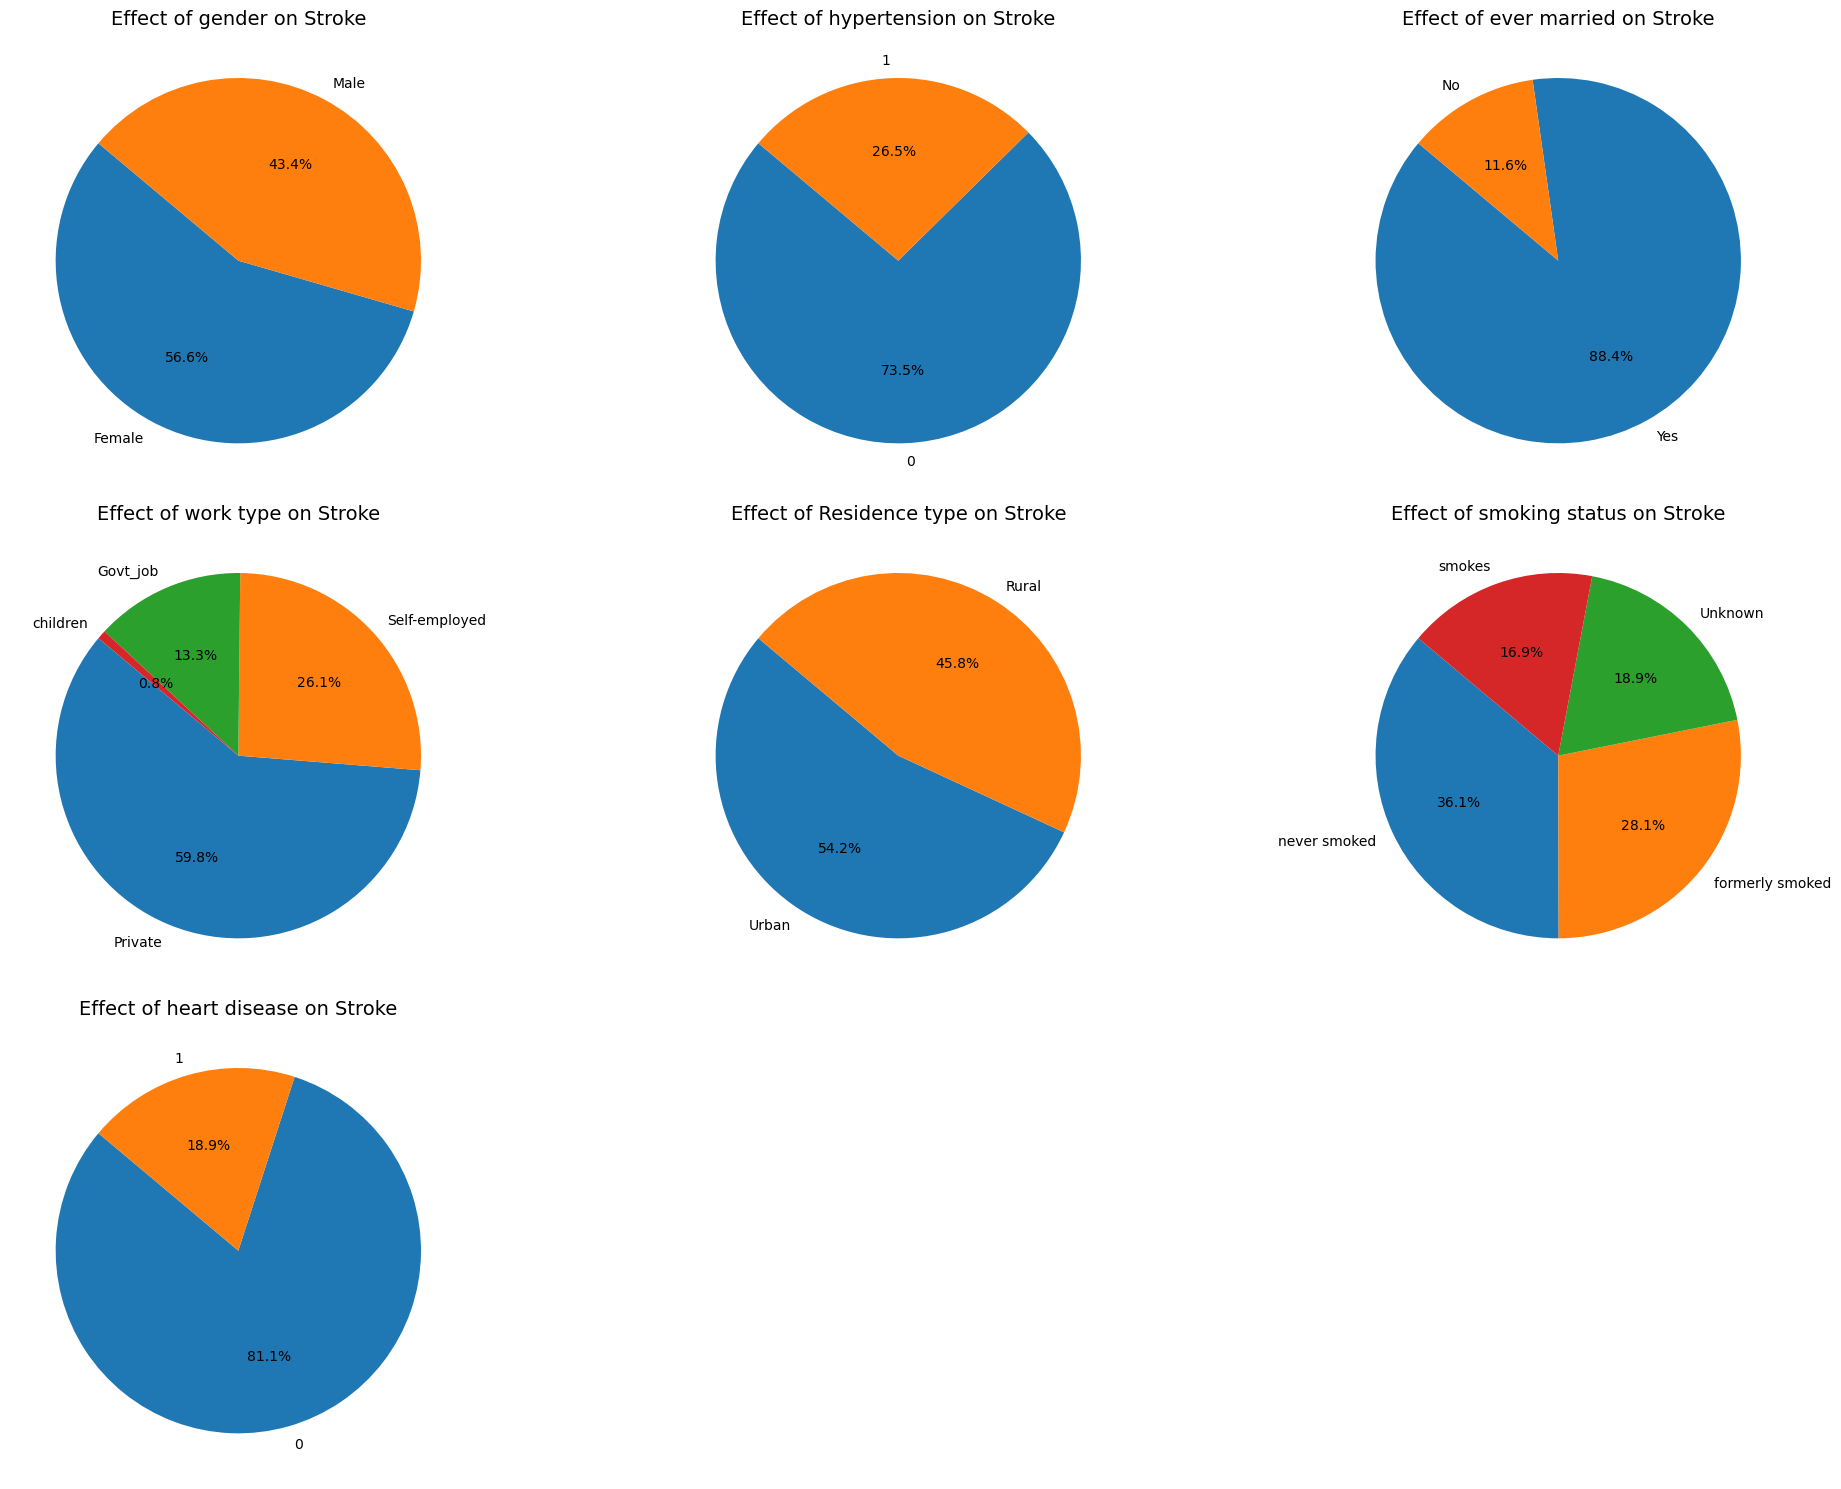

In [186]:

# Define categorical columns to visualize
columns = ['gender', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'heart_disease']

# Set distinct color palette
colors = sns.color_palette("tab10", 10)  # 10 distinct colors

# Set figure size
plt.figure(figsize=(20, 15))

# Loop through the categorical columns and create pie charts
for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    
    # Calculate the proportion of stroke cases in each category
    stroke_counts = df[df['stroke'] == 1][col].value_counts()
    
    # Generate a unique set of colors for each pie chart
    pie_colors = colors[:len(stroke_counts)]  # Assign unique colors per category
    
    # Plot pie chart
    plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', colors=pie_colors, startangle=140)
    plt.title(f"Effect of {col.replace('_', ' ')} on Stroke", fontsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Violin Plots: Stroke vs. No Stroke Distributions

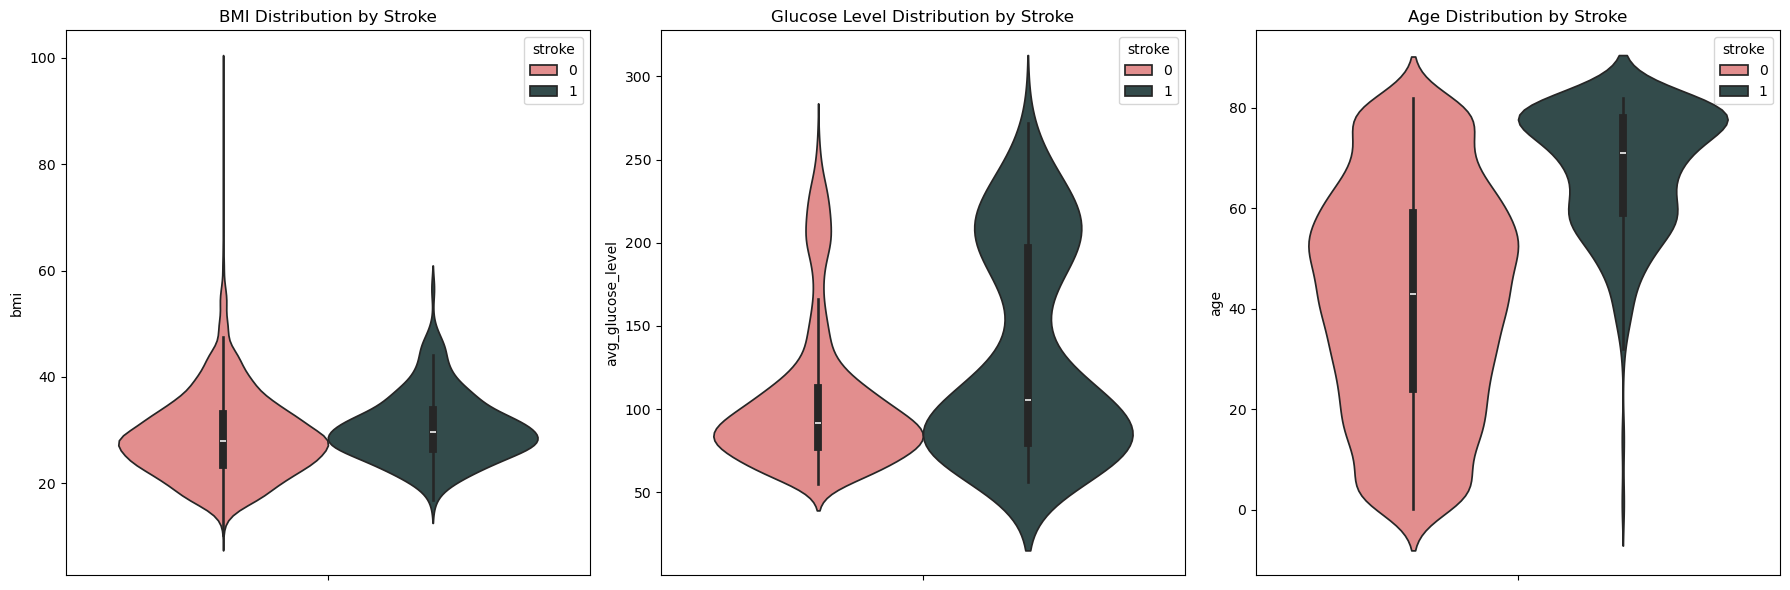

In [190]:

# Set figure size
plt.figure(figsize=(18, 6))

# Custom color palette
custom_palette = ['lightcoral', 'darkslategray']

# 1. Violin plot: BMI vs Stroke
plt.subplot(1, 3, 1)
sns.violinplot(y='bmi', hue='stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('BMI Distribution by Stroke')

# 2. Violin plot: Glucose Level vs Stroke
plt.subplot(1, 3, 2)
sns.violinplot(y='avg_glucose_level', hue='stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Glucose Level Distribution by Stroke')

# 3. Violin plot: Age vs Stroke
plt.subplot(1, 3, 3)
sns.violinplot(y='age', hue='stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Age Distribution by Stroke')

# Adjust layout to make it look better
plt.tight_layout()
plt.show()


## Understanding Stroke Risk: Histograms ofNumerical Features

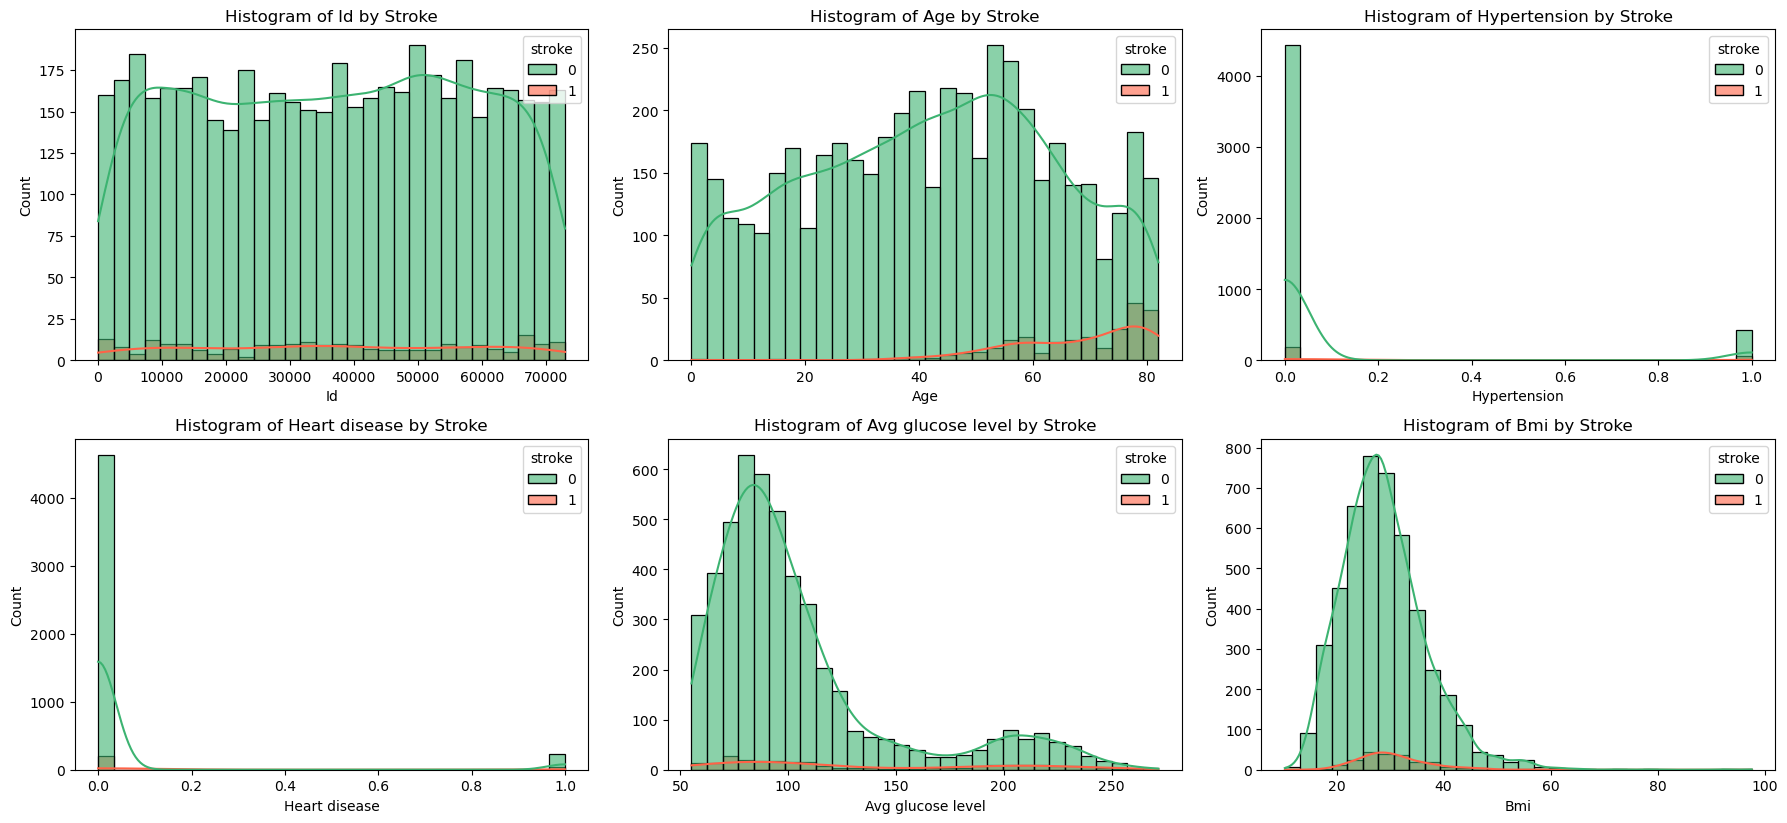

In [189]:

# Select all numerical columns (excluding 'stroke' since it's categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'stroke']  # Exclude stroke from histograms

# Set figure size dynamically based on the number of features
num_features = len(numerical_columns)
rows = (num_features // 3) + 1  # Arrange in rows of 3 plots
plt.figure(figsize=(18, 4 * rows))

# Custom color palette
custom_palette = ['mediumseagreen', 'tomato']

# Loop through all numerical features and plot histograms
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, 3, i + 1)  # Arrange plots in a grid
    sns.histplot(data=df, x=col, hue='stroke', bins=30, kde=True, palette=custom_palette, alpha=0.6)
    plt.title(f"Histogram of {col.replace('_', ' ').capitalize()} by Stroke", fontsize=12)
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=10)
    plt.ylabel("Count", fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Box Plots of Numerical Features by Stroke Status

C:\Users\somay\AppData\Local\Temp\ipykernel_29504\855758220.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette=custom_palette)
C:\Users\somay\AppData\Local\Temp\ipykernel_29504\855758220.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette=custom_palette)
C:\Users\somay\AppData\Local\Temp\ipykernel_29504\855758220.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette=custom_palette)


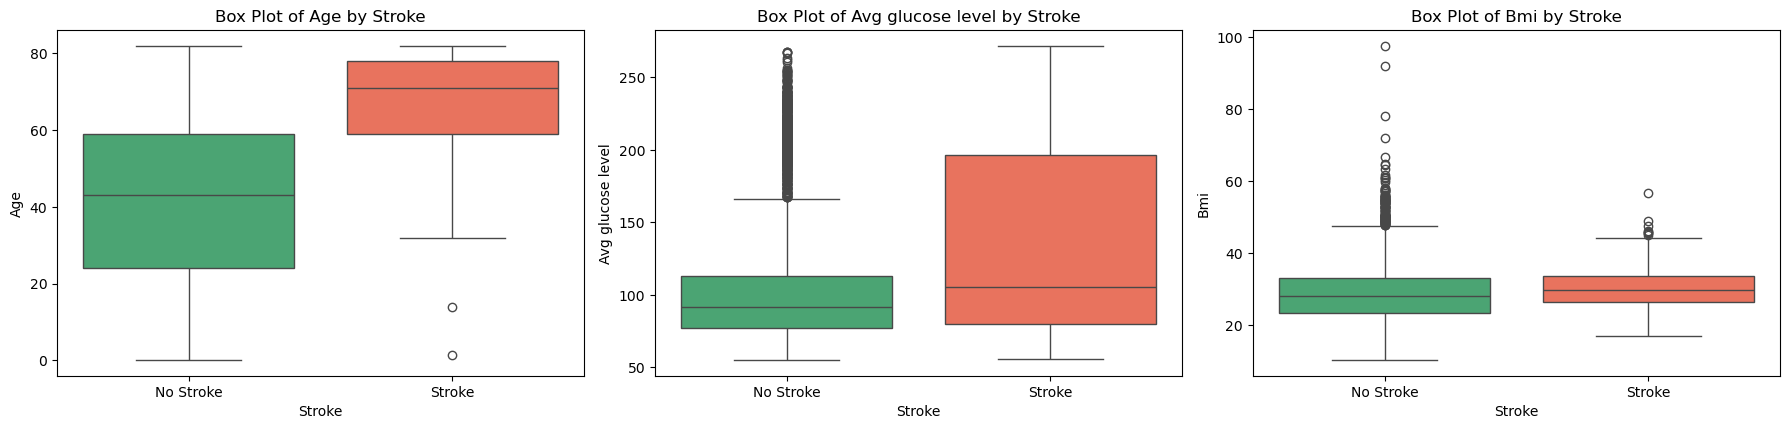

In [193]:

# Select only relevant numerical features (excluding 'id', 'heart_disease', 'hypertension', and categorical variables)
selected_columns = df.select_dtypes(include=['int64', 'float64']).columns
selected_columns = [col for col in selected_columns if col not in ['stroke', 'id', 'heart_disease', 'hypertension', 
                                                                   'gender', 'work_type', 'Residence_type', 
                                                                   'smoking_status', 'ever_married']]  # Remove categorical variables

# Set figure size dynamically based on the number of features
num_features = len(selected_columns)
rows = (num_features // 3) + 1  # Arrange in rows of 3 plots
plt.figure(figsize=(18, 4 * rows))

# Custom color palette
custom_palette = ['mediumseagreen', 'tomato']  # Light Green for No Stroke, Warm Color for Stroke

# Loop through selected features and plot box plots
for i, col in enumerate(selected_columns):
    plt.subplot(rows, 3, i + 1)  # Arrange plots in a grid
    sns.boxplot(x='stroke', y=col, data=df, palette=custom_palette)
    plt.title(f"Box Plot of {col.replace('_', ' ').capitalize()} by Stroke", fontsize=12)
    plt.xlabel("Stroke", fontsize=10)
    plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=10)
    plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Rename x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Fitting the Random Forest Model

In [38]:
# Create a random forest classifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=500, random_state=42)

In [39]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [40]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,908,14
Actual 1,36,922


Accuracy Score : 0.973404255319149
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       922
           1       0.99      0.96      0.97       958

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## Logistic Regression

In [43]:
# Apply SMOTE to oversample the minority class
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [44]:
# Create and train the Logistic Regression model with class_weight='balanced' to handle class imbalance
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=200, random_state=42)


In [45]:
# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

In [46]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[920   2]
 [ 74 884]]

Accuracy Score:
0.9595744680851064

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       922
           1       1.00      0.92      0.96       958

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



In [47]:
# Save the model
joblib.dump(rf_model, 'model/stroke_rf_model.pkl')

['model/stroke_rf_model.pkl']

In [48]:
# Save the model
joblib.dump(log_reg, 'model/stroke_logistic_reg_model.pkl')

['model/stroke_logistic_reg_model.pkl']

In [49]:
import joblib

# Load the trained model
model = joblib.load("model/stroke_rf_model.pkl")

# Print the feature names expected by the model
#print(model.feature_names_in_)
#print(model.feature_importances_)
# Assuming you used the same DataFrame during training (e.g., 'X_train')
# Print the feature names (columns) from the training DataFrame
feature_names = X_train.columns.tolist()  # If 'X_train' is the DataFrame used for training
print("Feature names:", feature_names)

Feature names: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [50]:
import joblib

# Load the trained model
model_lr = joblib.load("model/stroke_logistic_reg_model.pkl")

# Print the feature names expected by the model
print(model_lr.feature_names_in_)

['age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'gender_Female' 'gender_Male' 'gender_Other' 'ever_married_No'
 'ever_married_Yes' 'work_type_Govt_job' 'work_type_Never_worked'
 'work_type_Private' 'work_type_Self-employed' 'work_type_children'
 'Residence_type_Rural' 'Residence_type_Urban' 'smoking_status_Unknown'
 'smoking_status_formerly smoked' 'smoking_status_never smoked'
 'smoking_status_smokes']


In [51]:
import joblib
import pandas as pd

# Load the trained model
model_lr = joblib.load("model/stroke_logistic_reg_model.pkl")

# Create a sample input with all the required features
sample_data = {
    'age': [67],
    'hypertension': [1],  # 1 for Yes, 0 for No
    'heart_disease': [1],  # 0 for No, 1 for Yes
    'avg_glucose_level': [250.0],
    'bmi': [37],
    'gender_Female': [0],
    'gender_Male': [1],
    'gender_Other': [0],
    'ever_married_No': [0],
    'ever_married_Yes': [1],
    'work_type_Govt_job': [0],
    'work_type_Never_worked': [0],
    'work_type_Private': [1],
    'work_type_Self-employed': [0],
    'work_type_children': [0],
    'Residence_type_Rural': [0],
    'Residence_type_Urban': [1],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [0],
    'smoking_status_smokes': [1]
}

# Convert the sample data into a pandas DataFrame
sample_df = pd.DataFrame(sample_data)

# Use the trained model to make a prediction
prediction = model_lr.predict(sample_df)

# Output the prediction
print("Prediction:", prediction)


Prediction: [0]


In [52]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("model/stroke_rf_model.pkl")

# Create a sample input with all the required features
sample_data = {
    'age': [67],
    'hypertension': [1],  # 1 for Yes, 0 for No
    'heart_disease': [1],  # 0 for No, 1 for Yes
    'avg_glucose_level': [250.0],
    'bmi': [37],
    'gender_Female': [0],
    'gender_Male': [1],
    'gender_Other': [0],
    'ever_married_No': [0],
    'ever_married_Yes': [1],
    'work_type_Govt_job': [0],
    'work_type_Never_worked': [0],
    'work_type_Private': [1],
    'work_type_Self-employed': [0],
    'work_type_children': [0],
    'Residence_type_Rural': [0],
    'Residence_type_Urban': [1],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [0],
    'smoking_status_smokes': [1]
}

# Convert the sample data into a pandas DataFrame
sample_df = pd.DataFrame(sample_data)

# Use the trained model to make a prediction
prediction = model.predict(sample_df)

# Output the prediction
print("Prediction:", prediction)


Prediction: [1]


C:\Users\somay\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Principal Component Analysis (PCA)

In [53]:
# Import PCA and MLPClassifier from SKLearn
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


In [54]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Keeping 10 principal components 
X_train_pca = pca.fit_transform(X_train)  # Fit and transform training data
X_test_pca = pca.transform(X_test)  # Transform test data

# Display explained variance ratio to see how much variance each component captures
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [8.66594223e-01 1.21122199e-01 1.15772072e-02 1.11159347e-04
 1.03636023e-04 8.03502170e-05 7.68046388e-05 6.36615693e-05
 5.63580863e-05 4.85417204e-05]


In [55]:
# Convert PCA-transformed data into a DataFrame
# Create column names for PCA components
pca_columns = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]

# Convert to DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Display the first few rows of the transformed training data
display(X_train_pca_df.head())


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-17.416101,-18.260944,-10.273936,0.440201,0.522142,-0.793053,-0.548502,0.817199,-0.045981,-0.263005
1,-54.138689,-7.622024,1.925868,-1.187213,-0.468907,-0.195914,0.522664,0.492208,0.373227,0.433789
2,-8.373842,-1.731988,10.542295,0.461268,0.657912,-0.746779,-0.351728,-0.376990,-0.535839,-0.004082
3,-34.823329,18.631004,-7.499475,0.107841,-0.772522,-0.547808,-0.734652,0.179494,-0.009538,-0.547603
4,57.835980,-12.015803,-6.484840,1.018597,0.531075,-0.033136,0.140571,-0.537916,-0.440584,-0.393958


## Neural Network Model (MLP Classifier)

In [57]:
# Train a Neural Network Model (MLP Classifier)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
                          activation='relu',  # ReLU activation function
                          solver='adam',  # Adam optimizer
                          max_iter=500,  # Train for 500 iterations
                          random_state=42)

# Train the model on PCA-transformed data
mlp_model.fit(X_train_pca_df, y_train)

# Make predictions on test data
y_pred_mlp = mlp_model.predict(X_test_pca_df)

# Print model training completion message
print("Neural Network Model Training Completed!")


Neural Network Model Training Completed!


In [58]:
# Evaluate the Neural Network Model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculate confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Convert confusion matrix to a DataFrame for better visualization
cm_mlp_df = pd.DataFrame(cm_mlp, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculate accuracy score
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Print results
print("Confusion Matrix:")
display(cm_mlp_df)
print("\nAccuracy Score:", accuracy_mlp)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))


Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,883,39
Actual 1,62,896



Accuracy Score: 0.9462765957446808

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       922
           1       0.96      0.94      0.95       958

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [59]:
# Save the trained Neural Network Model
joblib.dump(mlp_model, 'model/stroke_mlp_model.pkl')

print("Neural Network Model saved successfully!")


Neural Network Model saved successfully!


## Train a Neural Network Model Without PCA

In [60]:
# Train a Neural Network Model without PCA
mlp_model_no_pca = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
                                 activation='relu',  # ReLU activation function
                                 solver='adam',  # Adam optimizer
                                 max_iter=500,  # Train for 500 iterations
                                 random_state=42)

# Train the model on the original dataset (without PCA)
mlp_model_no_pca.fit(X_train, y_train)

# Make predictions on the original test dataset
y_pred_mlp_no_pca = mlp_model_no_pca.predict(X_test)

# Print completion message
print("Neural Network Model (Without PCA) Training Completed!")


Neural Network Model (Without PCA) Training Completed!


In [61]:
# Evaluate the Neural Network Model Without PCA

# Calculate confusion matrix
cm_mlp_no_pca = confusion_matrix(y_test, y_pred_mlp_no_pca)

# Convert confusion matrix to a DataFrame for better visualization
cm_mlp_no_pca_df = pd.DataFrame(cm_mlp_no_pca, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculate accuracy score
accuracy_mlp_no_pca = accuracy_score(y_test, y_pred_mlp_no_pca)

# Print results
print("Confusion Matrix:")
display(cm_mlp_no_pca_df)
print("\nAccuracy Score:", accuracy_mlp_no_pca)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_no_pca))


Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,868,54
Actual 1,33,925



Accuracy Score: 0.9537234042553191

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       922
           1       0.94      0.97      0.96       958

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [62]:
# Save the models
joblib.dump(mlp_model, 'model/mlp_model_with_pca.pkl')
joblib.dump(mlp_model_no_pca, 'model/mlp_model_without_pca.pkl')

print("Models saved successfully!")


Models saved successfully!


In [64]:
# Import permutation_importance from SKLearn
from sklearn.inspection import permutation_importance

# Compute permutation importance for the model without PCA
perm_importance = permutation_importance(mlp_model_no_pca, X_test, y_test, scoring="accuracy", random_state=42)

# Convert results to a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Display feature importance
display(feature_importance_df)


,Feature,Importance
0,age,0.138085
19,smoking_status_never smoked,0.087766
15,Residence_type_Rural,0.086277
16,Residence_type_Urban,0.080213
12,work_type_Private,0.080106
18,smoking_status_formerly smoked,0.076383
6,gender_Male,0.073830
20,smoking_status_smokes,0.070319
5,gender_Female,0.070106
17,smoking_status_Unknown,0.061702


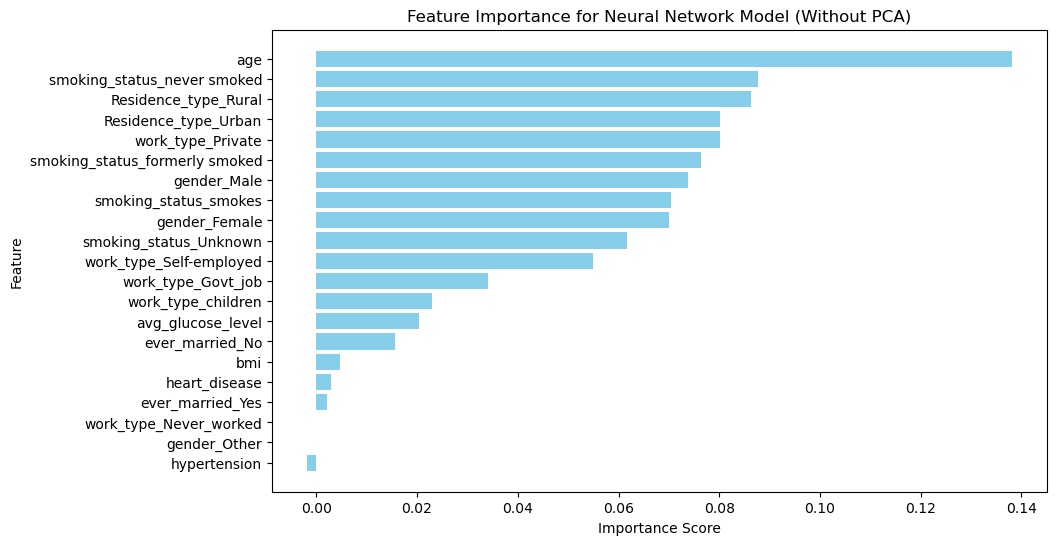

In [67]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Neural Network Model (Without PCA)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


## Applying StandardScaler for K-Means Clustering

In [73]:
# Import StandardScaler from SKLearn
from sklearn.preprocessing import StandardScaler

# Identify numeric columns to scale (excluding 'id' and categorical features)
numeric_features = ["age", "avg_glucose_level", "bmi"]
scaler = StandardScaler()

# Scale numeric features
X_train_scaled = X_train.copy()  # Keep original structure
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Display first few rows to check scaling
display(X_train_scaled.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
462,0.724754,0,0,-0.346502,-1.486964,True,False,False,False,True,...,False,True,False,False,True,False,True,False,False,False
4842,0.006621,0,0,-0.975761,0.041250,False,True,False,False,True,...,False,False,False,False,False,True,True,False,False,False
449,0.006621,0,0,-0.157796,1.496692,True,False,False,False,True,...,False,True,False,False,True,False,False,True,False,False
2167,-1.025695,0,0,-0.565530,-1.370529,True,False,False,False,True,...,False,True,False,False,False,True,True,False,False,False
8819,0.896373,1,0,0.995668,-0.580674,True,False,False,False,True,...,False,True,True,False,True,False,False,True,True,False


## Determine the Optimal Number of Clusters using the Elbow Method

In [74]:
# Import KMeans from SKLearn
from sklearn.cluster import KMeans

# Define the range of k values to test
inertia = []
k = list(range(1, 11)) 

# Compute inertia for each k
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(X_train_scaled)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,44455.351330
1,2,35948.013172
2,3,29581.058903
3,4,26944.068670
4,5,25445.962776


In [78]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [83]:
# Define the model with 4 clustersl
model = KMeans(n_clusters= 4, random_state=42)

# Make predictions
X_train_scaled["Cluster"] = model.fit_predict(X_train_scaled)

# Display the first few rows to see the cluster labels
display(X_train_scaled.head())


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Cluster
462,0.724754,0,0,-0.346502,-1.486964,True,False,False,False,True,...,True,False,False,True,False,True,False,False,False,3
4842,0.006621,0,0,-0.975761,0.041250,False,True,False,False,True,...,False,False,False,False,True,True,False,False,False,0
449,0.006621,0,0,-0.157796,1.496692,True,False,False,False,True,...,True,False,False,True,False,False,True,False,False,0
2167,-1.025695,0,0,-0.565530,-1.370529,True,False,False,False,True,...,True,False,False,False,True,True,False,False,False,2
8819,0.896373,1,0,0.995668,-0.580674,True,False,False,False,True,...,True,True,False,True,False,False,True,True,False,1


In [84]:
# Plot clusters 
X_train_scaled.hvplot.scatter(
    x="age", 
    y="avg_glucose_level", 
    by="Cluster", 
    title="Clusters Based on Age and Glucose Level"
)

:NdOverlay   [Cluster]
   :Scatter   [age]   (avg_glucose_level)

In [99]:
# Compute the mean values for each cluster
cluster_summary = X_train_scaled.groupby("Cluster").mean()

# Transpose the table
cluster_summary_transposed = cluster_summary.T

# Rename index for better readability
cluster_summary_transposed.index.name = "Feature"

# Reset index so features are shown properly
cluster_summary_transposed = cluster_summary_transposed.reset_index()

# Display the transposed table
cluster_summary_transposed.hvplot.table(title="Cluster Characteristics (Transposed)")

:Table   [Feature,0,1,2,3]

## K-Means clustering with PCA

In [102]:
# Apply PCA
n_components = 2  # Reduce to 2 dimensions for easy visualization
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)  # Apply PCA on the scaled dataset

# Convert PCA results into a DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Ensure it's a NumPy array before KMeans
X_train_pca_array = X_train_pca_df.values  

# Find optimal k using the Elbow Method
inertia = []
k = list(range(1, 11))  # Checking k from 1 to 10

for i in k:
    K_model = KMeans(n_clusters=i, random_state=42)
    K_model.fit(X_train_pca_array)  # FIX: Using NumPy array instead of DataFrame
    inertia.append(K_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,27759.711167
1,2,13743.994645
2,3,7268.532946
3,4,3336.017530
4,5,2841.238901


In [103]:
# Plot Elbow Curve
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve for PCA-transformed Data",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia"
)

:Curve   [k]   (inertia)

In [110]:
# Plot the clusters
X_train_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    title="K-Means Clustering on PCA-Reduced Stroke Data"
)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

In [112]:
# Compute the mean values for each cluster
cluster_summary = X_train_scaled.copy()  # Ensure the original dataset is used
cluster_summary["Cluster"] = X_train_pca_df["Cluster"]  # Assign clusters
cluster_summary = cluster_summary.groupby("Cluster").mean()  # Compute mean

# Transpose the table for better readability
cluster_summary_transposed = cluster_summary.T

# Rename index to "Feature"
cluster_summary_transposed.index.name = "Feature"

# Reset index so features are shown properly
cluster_summary_transposed = cluster_summary_transposed.reset_index()

# Display the transposed table
import hvplot.pandas
cluster_summary_transposed.hvplot.table(title="Cluster Characteristics (Transposed)")

:Table   [Feature,0.0,1.0,2.0,3.0]

## Top 10 Most Differentiating Features Across Clusters

In [113]:

# Compute the variance of each feature across clusters
feature_variance = cluster_summary_transposed.set_index("Feature").var(axis=1)

# Sort features by highest variance
top_features = feature_variance.sort_values(ascending=False).head(10)

# Display top differentiating features
print("Top 10 most differentiating features across clusters:")
print(top_features)


Top 10 most differentiating features across clusters:
Feature
bmi                               0.001588
avg_glucose_level                 0.000662
age                               0.000371
smoking_status_smokes             0.000330
work_type_Self-employed           0.000280
Residence_type_Urban              0.000230
Residence_type_Rural              0.000218
smoking_status_formerly smoked    0.000204
ever_married_No                   0.000129
work_type_Govt_job                0.000121
dtype: float64


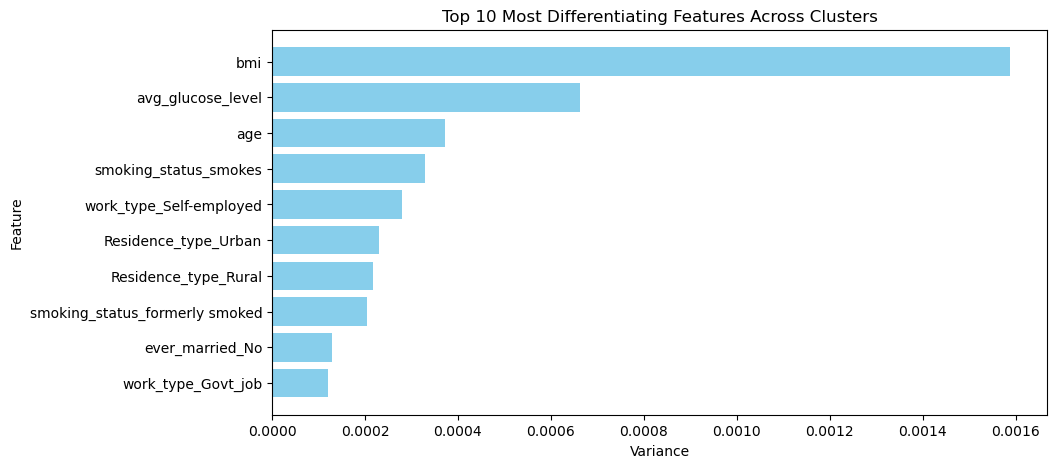

In [115]:
# Plot the top differentiating features
plt.figure(figsize=(10, 5))
plt.barh(top_features.index, top_features.values, color='skyblue')
plt.xlabel("Variance")
plt.ylabel("Feature")
plt.title("Top 10 Most Differentiating Features Across Clusters")  # Add the title
plt.gca().invert_yaxis()  # Invert y-axis to match sorting order
plt.show()

In [164]:
df_cleaned.to_csv("stroke_data_cleaned.csv", index=False)